# Time Series
Time series merupakan serangkaian pengamatan terhadap suatu peristiwa, kejadian, gejala atau perubahan yang terjadi dari waktu ke waktu. Sebagai contoh yaitu data yang dikumpulkan terkait dengan satuan waktu yaitu jam, hari, minggu, bulan, tahun, maupun semester dan data yang diamati sepanjang waktu. Pola data time series digunakan untuk menganalisis data masa lalu yang akan digunakan untuk meramalkan suatu nilai atau kejadian pada masa yang akan datang.

## Import Library

In [1]:
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

## Membaca Data

In [2]:
beras = pd.read_csv('C:/Users/hangg/Downloads/Random Aslab/DSDA/Material/Supply_Beras.csv',index_col='Periode', parse_dates=True, sep = ';')
print(beras.shape)
print(beras.head())

(48, 1)
            Produksi
Periode             
2017-01-01    808181
2017-02-01    803341
2017-03-01    802040
2017-04-01    788637
2017-05-01    775817


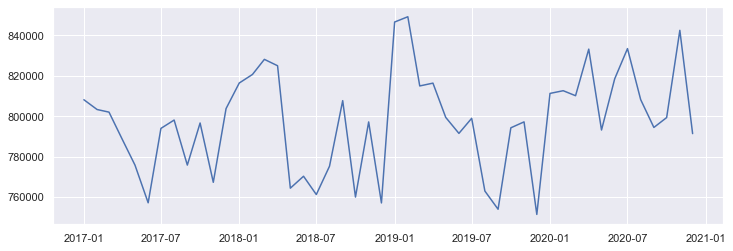

In [3]:
plt.figure(figsize=(12,4))
plt.plot(beras.index, beras['Produksi'])

## Memisah data

In [4]:
train = beras[:40]
test = beras[40:]

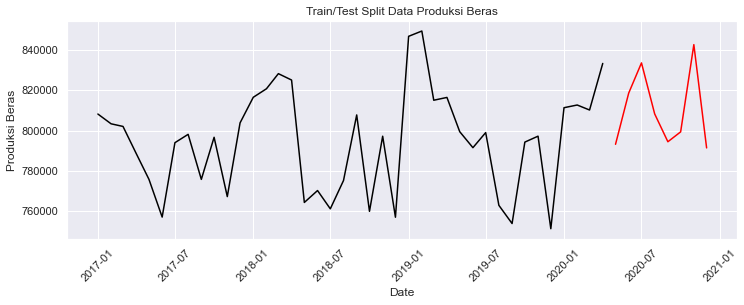

In [5]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Produksi Beras')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test Split Data Produksi Beras")
plt.show()

## ARMA
Metode Autoregressive Moving Average (ARMA) memodelkan langkah berikutnya dalam urutan sebagai fungsi linier dari pengamatan dan kesalahan residual pada deret waktu sebelumnya.
Metode ini menggabungkan kedua model Autoregression (AR) dan Moving Average (MA). <br>

### Implementasi Metode ARMA
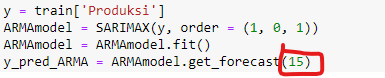 <br>
Terlihat bahwa implementasi di bawah untuk memprediksi selama 15 waktu ke depan

In [6]:
y = train['Produksi']
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()
y_pred_ARMA = ARMAmodel.get_forecast(15)
y_pred_df_ARMA = y_pred_ARMA.conf_int(alpha = 0.05) 
y_pred_df_ARMA["Predictions"] = ARMAmodel.predict(start = y_pred_df_ARMA.index[0], end = y_pred_df_ARMA.index[-1])
y_pred_out_ARMA = y_pred_df_ARMA["Predictions"] 

### Mencetak dan memvisualisasikan hasil prediksi metode ARMA

In [7]:
y_pred_out_ARMA

2020-05-01    819426.779361
2020-06-01    819302.224742
2020-07-01    819177.689056
2020-08-01    819053.172300
2020-09-01    818928.674471
2020-10-01    818804.195565
2020-11-01    818679.735581
2020-12-01    818555.294515
2021-01-01    818430.872364
2021-02-01    818306.469125
2021-03-01    818182.084797
2021-04-01    818057.719374
2021-05-01    817933.372856
2021-06-01    817809.045238
2021-07-01    817684.736519
Freq: MS, Name: Predictions, dtype: float64

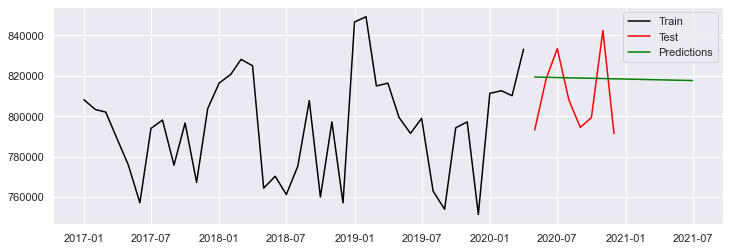

In [8]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out_ARMA, color='green', label = 'Predictions')
plt.legend()

In [9]:
arma_rmse = np.sqrt(mean_squared_error(y_pred_df_ARMA["Predictions"].values, y_pred_df_ARMA["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  0.0


## ARIMA
Metode Autoregressive Integrated Moving Average (ARIMA) memodelkan deret waktu berikutnya dalam urutan sebagai fungsi linier dari pengamatan yang berbeda dan kesalahan residual pada deret waktu sebelumnya.
Metode ini menggabungkan kedua model Autoregression (AR) dan Moving Average (MA) serta langkah pra-pemrosesan diferensial dari urutan untuk membuat urutan stasioner, yang disebut integrasi (I). <br>
### Implementasi Metode ARIMA

In [10]:
ARIMAmodel = ARIMA(y, order = (1, 0, 1))
ARIMAmodel = ARIMAmodel.fit()

y_pred_ARIMA = ARIMAmodel.get_forecast(15)
y_pred_df_ARIMA = y_pred_ARIMA.conf_int(alpha = 0.05) 
y_pred_df_ARIMA["Predictions"] = ARIMAmodel.predict(start = y_pred_df_ARIMA.index[0], end = y_pred_df_ARIMA.index[-1])
y_pred_out_ARIMA = y_pred_df_ARIMA["Predictions"]

### Mencetak dan memvisualisasikan hasil prediksi metode ARIMA

In [11]:
y_pred_out_ARIMA

2020-05-01    806960.204568
2020-06-01    799728.509070
2020-07-01    796858.819686
2020-08-01    795720.066378
2020-09-01    795268.185035
2020-10-01    795088.868981
2020-11-01    795017.712587
2020-12-01    794989.476228
2021-01-01    794978.271445
2021-02-01    794973.825151
2021-03-01    794972.060768
2021-04-01    794971.360623
2021-05-01    794971.082791
2021-06-01    794970.972541
2021-07-01    794970.928792
Freq: MS, Name: Predictions, dtype: float64

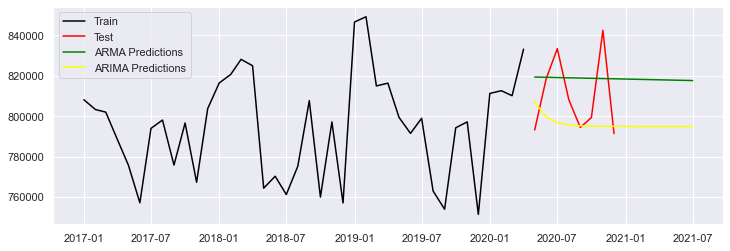

In [12]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out_ARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.legend()

In [13]:
arima_rmse = np.sqrt(mean_squared_error(y_pred_df_ARMA["Predictions"].values, y_pred_df_ARIMA["Predictions"]))
print("RMSE: ",arima_rmse)

RMSE:  22434.3033838866


## SARIMA
Seasonal Autoregressive Integrated Moving Average (SARIMA) merupakan pengembangan dari model Autoregressive Integrated Moving Average (ARIMA) padadata runtun waktu yang memiliki pola musiman. <br>
### Implementasi SARIMA

In [14]:
SARIMAXmodel = SARIMAX(y, order = (1, 0, 1), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred_SARIMA = SARIMAXmodel.get_forecast(15)
y_pred_df_SARIMA = y_pred_SARIMA.conf_int(alpha = 0.05) 
y_pred_df_SARIMA["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_SARIMA.index[0], end = y_pred_df_SARIMA.index[-1])
y_pred_out_SARIMA = y_pred_df_SARIMA["Predictions"] 

### Mencetak dan memvisualisasikan hasil prediksi metode SARIMA

In [15]:
y_pred_out_SARIMA

2020-05-01    787982.684464
2020-06-01    780934.325948
2020-07-01    790521.997022
2020-08-01    744968.911394
2020-09-01    735890.444175
2020-10-01    789935.441868
2020-11-01    796623.203484
2020-12-01    736939.579624
2021-01-01    794787.923724
2021-02-01    798160.204315
2021-03-01    797149.434400
2021-04-01    828920.746778
2021-05-01    778001.964625
2021-06-01    770812.042095
2021-07-01    784311.761620
Freq: MS, Name: Predictions, dtype: float64

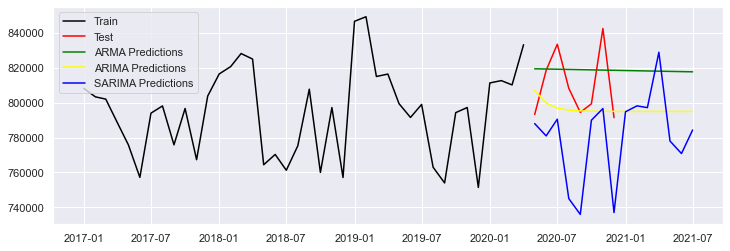

In [16]:
plt.figure(figsize=(12,4))
plt.plot(train, color = "black", label = "Train")
plt.plot(test, color = "red", label = "Test")
plt.plot(y_pred_out_ARMA, color='green', label = 'ARMA Predictions')
plt.plot(y_pred_out_ARIMA, color='Yellow', label = 'ARIMA Predictions')
plt.plot(y_pred_out_SARIMA, color='Blue', label = 'SARIMA Predictions')
plt.legend()

In [17]:
sarima_rmse = np.sqrt(mean_squared_error(y_pred_df_ARMA["Predictions"].values, y_pred_df_SARIMA["Predictions"]))
print("SARIMA RMSE: ",sarima_rmse)

SARIMA RMSE:  44787.685206632435
